## Histograms of Values

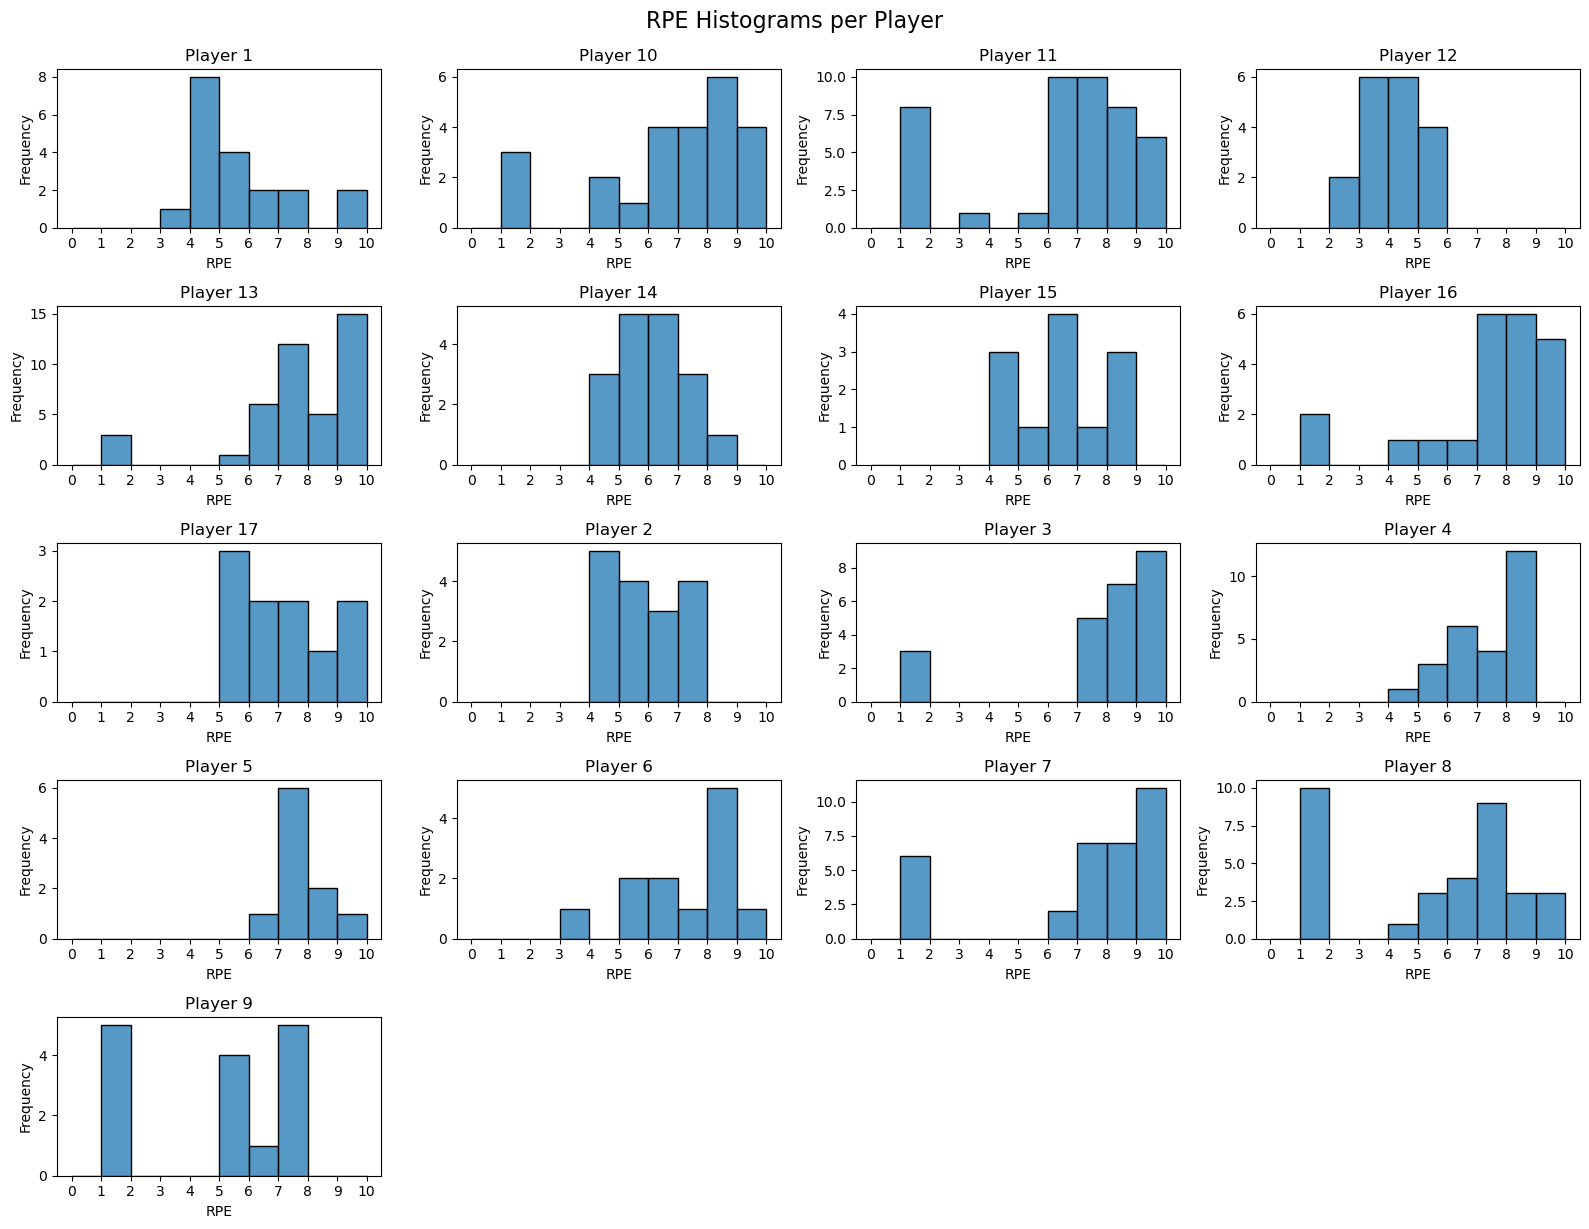

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your processed data
df = pd.read_csv("merged_rpe_wellness.csv")

# Convert PlayerID to categorical for plotting
df["PlayerID"] = df["PlayerID"].astype(str)

# Filter out missing RPE values
df = df.dropna(subset=["RPE"])

# Set up the plot grid: 4 rows x 4 columns = 16 players
players = df["PlayerID"].unique()
n_players = len(players)
n_cols = 4
n_rows = -(-n_players // n_cols)  # ceiling division

plt.figure(figsize=(16, 12))
for i, player_id in enumerate(sorted(players), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[df["PlayerID"] == player_id]["RPE"], bins=range(0, 11), kde=False)
    plt.title(f"Player {player_id}")
    plt.xlabel("RPE")
    plt.ylabel("Frequency")
    plt.xticks(range(0, 11))
    plt.tight_layout()

plt.suptitle("RPE Histograms per Player", fontsize=16, y=1.02)
plt.show()

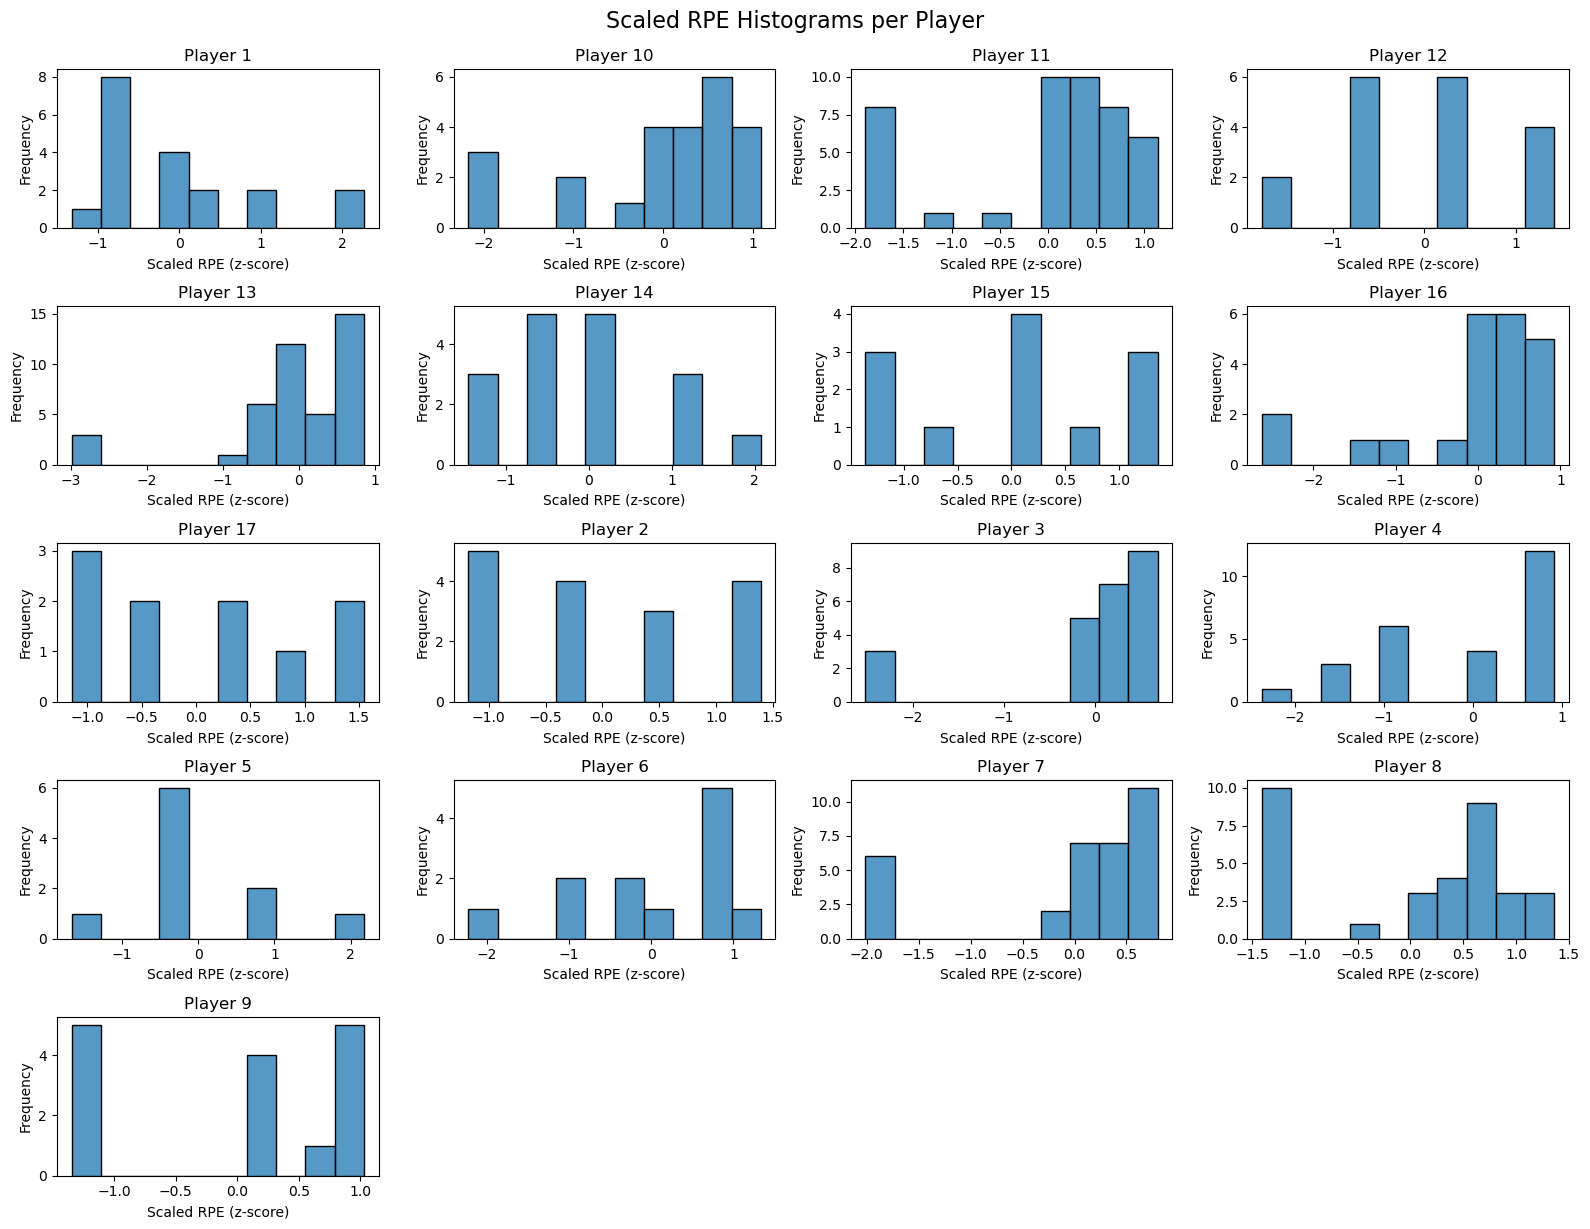

In [25]:
# Standardize RPE per player using z-scores
df["RPE_scaled"] = df.groupby("PlayerID")["RPE"].transform(
    lambda x: (x - x.mean()) / x.std(ddof=0)
)

# Set up subplot grid
players = df["PlayerID"].unique()
n_players = len(players)
n_cols = 4
n_rows = -(-n_players // n_cols)

plt.figure(figsize=(16, 12))
for i, player_id in enumerate(sorted(players), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[df["PlayerID"] == player_id]["RPE_scaled"], bins=10, kde=False)
    plt.title(f"Player {player_id}")
    plt.xlabel("Scaled RPE (z-score)")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.suptitle("Scaled RPE Histograms per Player", fontsize=16, y=1.02)
plt.show()

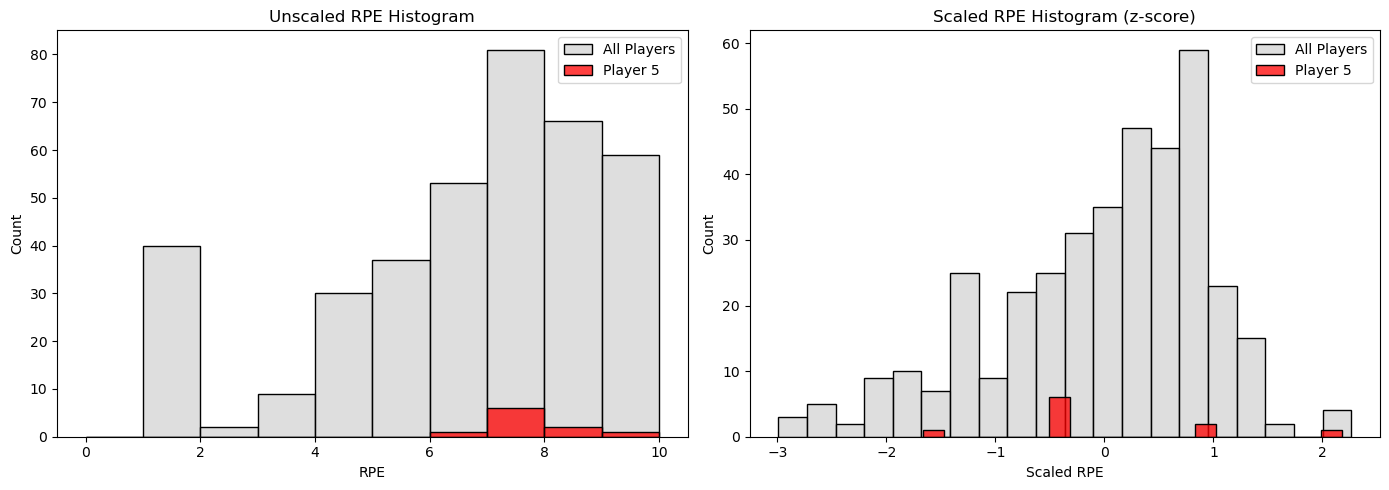

In [26]:
# Player 5's data
player_5 = df[df["PlayerID"] == '5']

plt.figure(figsize=(14, 5))

# Unscaled RPE
plt.subplot(1, 2, 1)
sns.histplot(df["RPE"], bins=range(0, 11), color="lightgray", label="All Players", kde=False)
sns.histplot(player_5["RPE"], bins=range(0, 11), color="red", label="Player 5", kde=False)
plt.title("Unscaled RPE Histogram")
plt.xlabel("RPE")
plt.ylabel("Count")
plt.legend()

# Scaled RPE
plt.subplot(1, 2, 2)
sns.histplot(df["RPE_scaled"], bins=20, color="lightgray", label="All Players", kde=False)
sns.histplot(player_5["RPE_scaled"], bins=20, color="red", label="Player 5", kde=False)
plt.title("Scaled RPE Histogram (z-score)")
plt.xlabel("Scaled RPE")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
import statsmodels.api as sm

df = pd.read_csv("merged_rpe_wellness.csv")

# Drop rows with missing values in predictors or USG
df_model = df.dropna()
X = df_model.drop(columns=["Date", "PlayerID", "SessionType", "USGMeasurement", "USG"])  # predictors
y = df_model["USG"]

# Add constant term to predictors
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    USG   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     11.50
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           5.57e-15
Time:                        19:52:50   Log-Likelihood:                 234.96
No. Observations:                 100   AIC:                            -435.9
Df Residuals:                      83   BIC:                            -391.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Training              1.0071      0.09

In [35]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv("merged_rpe_wellness.csv")

# Columns to scale (subjective ratings)
subjective_cols = [
    "RPE", "Fatigue", "Soreness", "Desire", "Irritability", "SleepQuality",
    "ObjectiveRating", "FocusRating", "BestOutOfMyself", "TrainingReadiness"
]

# Drop rows with missing USG or key predictors
# required_cols = ["USG", "Nutrition"] + subjective_cols
df_model = df.dropna()

# Scale subjective columns **within each PlayerID**
for col in subjective_cols:
    df_model[col] = df_model.groupby("PlayerID")[col].transform(
        lambda x: (x - x.mean()) / x.std(ddof=0) if x.std(ddof=0) != 0 else 0
    )

# Define predictors: keep all numeric columns except identifiers and target
X = df_model.drop(columns=["Date", "PlayerID", "SessionType", "USGMeasurement", "USG"])

# Add constant
X = sm.add_constant(X)

# Response variable
y = df_model["USG"]

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    USG   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     7.894
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           5.53e-11
Time:                        19:51:45   Log-Likelihood:                 222.80
No. Observations:                 100   AIC:                            -411.6
Df Residuals:                      83   BIC:                            -367.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Training              0.9739      0.04

C:\Users\Andrew\AppData\Local\Temp\ipykernel_16324\1174467990.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[col] = df_model.groupby("PlayerID")[col].transform(
